In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
from matplotlib import font_manager, rc, rcParams

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
df = pd.read_csv('/Users/ck/Desktop/우체국/001제공데이터/training_new.csv', names=['발신일자', '발송우체국', '도착구', '수량'])

In [3]:
df['발신일자'] = pd.to_datetime(df['발신일자'], format='%Y%m%d')

In [4]:
df1 = df.copy()

In [5]:
df1.set_index('발신일자', inplace=True)

In [6]:
df1.head()

,발송우체국,도착구,수량
발신일자,,,
2017-12-01,가평우체국,1,11
2017-12-01,가평우체국,24,10
2017-12-01,가평우체국,17,8
2017-12-01,가평우체국,9,5
2017-12-01,가평우체국,14,11


In [7]:
df1[(df1.index.isin(pd.date_range('2017-12-01', '2017-12-23')))]

,발송우체국,도착구,수량
발신일자,,,
2017-12-01,가평우체국,1,11
2017-12-01,가평우체국,24,10
2017-12-01,가평우체국,17,8
2017-12-01,가평우체국,9,5
2017-12-01,가평우체국,14,11
2017-12-01,가평우체국,11,11
2017-12-01,가평우체국,0,11
2017-12-01,가평우체국,18,9
2017-12-01,가평우체국,22,14


In [8]:
df1.shape

(1338140, 3)

In [9]:
df1.groupby(['도착구', pd.Grouper(freq='D')])[['수량']].agg(np.sum)

수량
도착구 발신일자             
0   2017-12-01   5829
    2017-12-02    514
    2017-12-03    186
    2017-12-04   8525
    2017-12-05   6743
    2017-12-06   6134
    2017-12-07   6188
    2017-12-08   5752
    2017-12-09    610
    2017-12-10    230
    2017-12-11   8242
    2017-12-12   6785
    2017-12-13   6238
    2017-12-14   5938
    2017-12-15   5922
    2017-12-16    550
    2017-12-17    244
    2017-12-18   8138
    2017-12-19   6766
    2017-12-20   6429
    2017-12-21   6225
    2017-12-22   5826
    2017-12-23    615
    2017-12-27   6443
    2017-12-28   5985
    2017-12-29   5049
    2017-12-30    534
    2017-12-31    201
    2018-01-01    186
    2018-01-02   7436
...               ...
24  2018-11-01   5850
    2018-11-02   5698
    2018-11-03    633
    2018-11-04    250
    2018-11-05   8939
    2018-11-06   6307
    2018-11-07   5923
    2018-11-08   5831
    2018-11-09   5627
    2018-11-10    625
    2018-11-11    253
    2018-11-12  10506
    2018-11-13   6329
    2018-11-14   6209
    2018-11-15   5953
    2018-11-16   5581
    2018-11-17    767
    2018-11-18    244
    2018-11-19   9127
    2018-11-20   6349
    2018-11-21   6358
    2018-11-22   6241
    2018-11-23   6019
    2018-11-24    668
    2018-11-25    165
    2018-11-26   9895
    2018-11-27   6419
    2018-11-28   6362
    2018-11-29   6403
    2018-11-30   5884

[8604 rows x 1 columns]

In [10]:
# 주로 합계, 평균, 중앙값
grouped_sum = df1.groupby(pd.Grouper(freq='W'))[['수량']].agg(np.sum)
grouped_mean = df1.groupby(pd.Grouper(freq='W'))[['수량']].agg(np.mean)
grouped_median = df1.groupby(pd.Grouper(freq='W'))[['수량']].agg(np.median)
grouped_sum_day = df1.groupby(pd.Grouper(freq='D'))[['수량']].agg(np.sum)

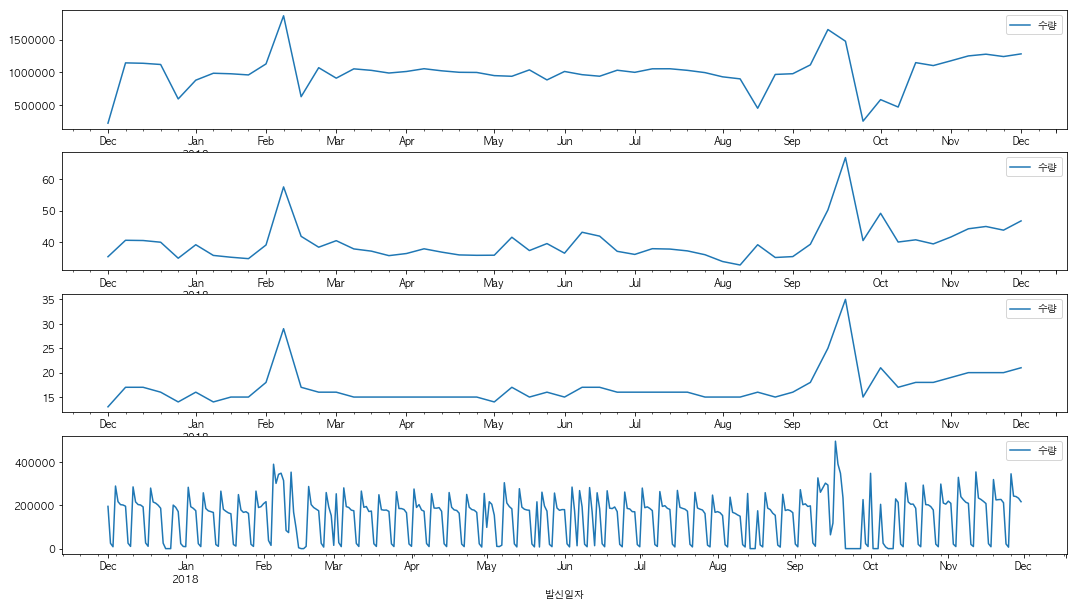

In [11]:
fig, axes = plt.subplots(4, 1, figsize=(18, 10))
grouped_sum.plot(ax=axes.flat[0])
grouped_mean.plot(ax=axes.flat[1])
grouped_median.plot(ax=axes.flat[2])
grouped_sum_day.plot(ax=axes.flat[3])
plt.show()

In [12]:
print(df1.shape)
df1.head()

(1338140, 3)


,발송우체국,도착구,수량
발신일자,,,
2017-12-01,가평우체국,1,11
2017-12-01,가평우체국,24,10
2017-12-01,가평우체국,17,8
2017-12-01,가평우체국,9,5
2017-12-01,가평우체국,14,11


In [13]:
dates = ['2017-12-24', '2017-12-25', '2017-12-26', '2018-08-14', '2018-08-15', '2018-08-16', '2018-09-21', 
         '2018-09-22', '2018-09-23', '2018-09-24', '2018-09-25', '2018-09-26', '2018-09-27', '2018-10-02', 
         '2018-10-03', '2018-10-04', '2018-10-08', '2018-10-09', '2018-10-10']

In [14]:
temp = pd.DataFrame()
temp['도착구'] = np.repeat(list(range(0, 25)), len(dates))

In [15]:
temp['발신일자'] = dates * 25
temp['발신일자'] = pd.to_datetime(temp['발신일자'])
temp['수량'] = None
temp['발송우체국'] = None

In [16]:
temp.set_index('발신일자', inplace=True)

In [17]:
temp.head()

,도착구,수량,발송우체국
발신일자,,,
2017-12-24,0,None,None
2017-12-25,0,None,None
2017-12-26,0,None,None
2018-08-14,0,None,None
2018-08-15,0,None,None


In [18]:
df1 = pd.concat([df1, temp], sort=True)

In [19]:
df1['요일'] = df1.index.dayofweek
df1['월'] = df1.index.month
df1['일'] = df1.index.day
df1.head()

,도착구,발송우체국,수량,요일,월,일
발신일자,,,,,,
2017-12-01,1,가평우체국,11,4,12,1
2017-12-01,24,가평우체국,10,4,12,1
2017-12-01,17,가평우체국,8,4,12,1
2017-12-01,9,가평우체국,5,4,12,1
2017-12-01,14,가평우체국,11,4,12,1


In [20]:
seoul = pd.read_excel('input/seoul.xlsx', sheet_name=0, header=0)
seoul.head()

FileNotFoundError: [Errno 2] No such file or directory: 'input/seoul.xlsx'

In [21]:
names = {}
for i, j in seoul.iterrows():
    names[i] = j.values[0]

NameError: name 'seoul' is not defined

In [22]:
names

{}

In [23]:
df1['도착구'].replace(names, inplace=True)

In [24]:
weather = pd.read_csv('input/weather.csv', encoding='cp949')
weather['일시'] = pd.to_datetime(weather['일시'])
weather.head()

FileNotFoundError: File b'input/weather.csv' does not exist

In [ ]:
merge1 = pd.merge(df1, weather, left_on=df1.index, right_on='일시', how='left')
print(merge1.shape)
merge1.tail()

In [ ]:
df5 = pd.read_csv('input/65세이상인구.csv')
df5.head()

In [ ]:
df5 = df5.drop(['65세이상내국인합계', '65세이상내국인남자', '65세이상내국인여자', '65세이상외국인합계', '65세이상외국인남자', '65세이상외국인여자'], axis=1)
df5.head()

In [ ]:
merge2 = pd.merge(merge1, df5, left_on='도착구', right_on='지역', how='left')
print(merge2.shape)
merge2.head()

In [ ]:
# df6 = pd.read_csv('input/서울시인구추이통계.csv')
# df6.head()

In [ ]:
df7 = pd.read_csv('input/종사자수.csv')
df7.head()

In [ ]:
merge3 = pd.merge(merge2, df7, left_on='도착구', right_on='구명', how='left')
print(merge3.shape)
merge3.head()

In [ ]:
df8 = pd.read_csv('input/자치구인구.csv')
df8.head()

In [ ]:
df8 = df8.groupby(by='시군구명').agg(np.sum)
df8.head()

In [ ]:
merge4 = pd.merge(merge3, df8, left_on='도착구', right_on=, how='left')
print(merge4.shape)
merge4.head()

In [ ]:
df9 = pd.read_excel('input/자치구별경제활동.xls')
df9.head()

In [ ]:
merge5 = pd.merge(merge4, df9, left_on='도착구', right_on='자치구', how='left')
print(merge5.shape)
merge5.head()

In [ ]:
df10 = pd.read_csv('input/구별1인가구수.csv')
df10.head()

In [ ]:
merge6 = pd.merge(merge5, df10, left_on='도착구', right_on='구명', how='left')
print(merge6.shape)
merge6.head()

In [ ]:
df8.columns.tolist()

In [ ]:
merge6 = merge6.drop(['지역', '구명_x', '기준일ID', '시군구코드', '자치구', '구명_y', '지점', '발송우체국'] + df8.columns.tolist(), axis=1)

In [ ]:
merge6.fillna(0, inplace=True)

In [ ]:
reverse_seoul = {}
for i, d in seoul.iterrows():
    reverse_seoul[d[0]] = i

reverse_seoul

In [ ]:
merge6['도착구'].replace(reverse_seoul, inplace=True)

In [ ]:
merge6.set_index('일시', inplace=True)

In [ ]:
X_test1 = merge6[merge6.index.isin(pd.date_range('2017-12-24', '2017-12-26'))].drop(['수량'], axis=1)
X_test2 = merge6[merge6.index.isin(pd.date_range('2018-08-14', '2018-08-16'))].drop(['수량'], axis=1)
X_test3 = merge6[merge6.index.isin(pd.date_range('2018-09-21', '2018-09-27'))].drop(['수량'], axis=1)
X_test4 = merge6[merge6.index.isin(pd.date_range('2018-10-02', '2018-10-04'))].drop(['수량'], axis=1)
X_test5 = merge6[merge6.index.isin(pd.date_range('2018-10-08', '2018-10-10'))].drop(['수량'], axis=1)

In [28]:
X_train1 = merge6[merge6.index.isin(pd.date_range('2017-12-01', '2017-12-23'))].drop(['수량'], axis=1)
y_train1 = merge6[merge6.index.isin(pd.date_range('2017-12-01', '2017-12-23'))]['수량']

NameError: name 'merge6' is not defined

In [ ]:
X_train2 = merge6[(merge6.index.isin(pd.date_range('2017-12-01', '2018-08-13'))) & 
                  (~merge6.index.isin(pd.date_range('2017-12-24', '2017-12-26')))].drop(['수량'], axis=1)
y_train2 = merge6[(merge6.index.isin(pd.date_range('2017-12-01', '2018-08-13'))) & 
                  (~merge6.index.isin(pd.date_range('2017-12-24', '2017-12-26')))]['수량']

In [ ]:
X_test3 = merge6[(merge6.index.isin(pd.date_range('2017-12-01', '2018-09-20'))) & 
                 (~merge6.index.isin(pd.date_range('2017-12-24', '2017-12-26'))) & 
                 (~merge6.index.isin(pd.date_range('2018-08-14', '2018-08-16')))].drop(['수량'], axis=1)
y_train3 = merge6[(merge6.index.isin(pd.date_range('2017-12-01', '2018-09-20'))) & 
                  (~merge6.index.isin(pd.date_range('2017-12-24', '2017-12-26'))) & 
                  (~merge6.index.isin(pd.date_range('2018-08-14', '2018-08-16')))]['수량']

In [ ]:
X_test4 = merge6[(merge6.index.isin(pd.date_range('2017-12-01', '2018-10-02'))) & 
                 (~merge6.index.isin(pd.date_range('2017-12-24', '2017-12-26'))) & 
                 (~merge6.index.isin(pd.date_range('2018-08-14', '2018-08-16'))) &
                 (~merge6.index.isin(pd.date_range('2018-09-21', '2018-09-27')))].drop(['수량'], axis=1)
y_train4 = merge6[(merge6.index.isin(pd.date_range('2017-12-01', '2018-10-02'))) & 
                  (~merge6.index.isin(pd.date_range('2017-12-24', '2017-12-26'))) & 
                  (~merge6.index.isin(pd.date_range('2018-08-14', '2018-08-16'))) &
                  (~merge6.index.isin(pd.date_range('2018-09-21', '2018-09-27')))]['수량']

In [ ]:
X_test5 = merge6[(merge6.index.isin(pd.date_range('2017-12-01', '2018-10-07'))) & 
                 (~merge6.index.isin(pd.date_range('2017-12-24', '2017-12-26'))) & 
                 (~merge6.index.isin(pd.date_range('2018-08-14', '2018-08-16'))) &
                 (~merge6.index.isin(pd.date_range('2018-09-21', '2018-09-27'))) &
                 (~merge6.index.isin(pd.date_range('2018-10-02', '2018-10-04')))].drop(['수량'], axis=1)
y_train5 = merge6[(merge6.index.isin(pd.date_range('2017-12-01', '2018-10-07'))) & 
                  (~merge6.index.isin(pd.date_range('2017-12-24', '2017-12-26'))) & 
                  (~merge6.index.isin(pd.date_range('2018-08-14', '2018-08-16'))) &
                  (~merge6.index.isin(pd.date_range('2018-09-21', '2018-09-27'))) &
                  (~merge6.index.isin(pd.date_range('2018-10-02', '2018-10-04')))]['수량']

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
reg1 = RandomForestRegressor(random_state=42).fit(X_train1, y_train1)

NameError: name 'X_train1' is not defined

In [ ]:
reg1.score(X_train1, y_train1)

In [ ]:
X_train1.shape

In [ ]:
df_test = df1.groupby(['도착구', pd.Grouper(freq='D')])[['수량']].agg(np.sum)

In [ ]:
df_test['요일'] = df_test.index.get_level_values(1).dayofweek
df_test['월'] = df_test.index.get_level_values(1).month
df_test['일'] = df_test.index.get_level_values(1).day
df_test.head()

In [ ]:
df_test = df_test.unstack(0).stack().reset_index('도착구')

In [ ]:
# test_X1 = df_test[df_test.index.isin(pd.date_range('2017-12-01', '2017-12-23'))].drop(['수량'], axis=1) # 발송우체국

# # test_X1.replace(reverse_seoul, inplace=True)
# test_X1 = pd.get_dummies(test_X1, columns=['요일'])
# test_y1 = df_test[df_test.index.isin(pd.date_range('2017-12-01', '2017-12-23'))]['수량']

In [ ]:
df_test = df_test[df_test['도착구'] == 0]

In [ ]:
test_X1 = df_test[df_test.index.isin(pd.date_range('2017-12-01', '2017-12-23'))].drop(['수량'], axis=1) # 발송우체국

# test_X1.replace(reverse_seoul, inplace=True)
test_X1 = pd.get_dummies(test_X1, columns=['요일'])
test_y1 = df_test[df_test.index.isin(pd.date_range('2017-12-01', '2017-12-23'))]['수량']

In [ ]:
reg_test = RandomForestRegressor().fit(test_X1, test_y1)
reg_test.score(test_X1, test_y1)

In [ ]:
pd.date_range('2017-12-24', '2017-12-26').tolist() * 25

In [ ]:
test_X1 = df1
test_y1 = df1

In [ ]:
X_train1.isnull().sum()

In [ ]:
X_test4 = merge6[merge6.index.isin(pd.date_range('2018-10-02', '2018-10-04'))].drop(['수량'], axis=1)
X_test5 = merge6[merge6.index.isin(pd.date_range('2018-10-08', '2018-10-10'))].drop(['수량'], axis=1)


X_train2 = merge6[merge6['일시'].isin(pd.date_range('2017-12-01', '2017-12-23'))].drop(['수량'])
X_train4 = merge6[merge6['일시'].isin(pd.date_range('2017-12-01', '2017-12-23'))].drop(['수량'])
X_train5 = merge6[merge6['일시'].isin(pd.date_range('2017-12-01', '2017-12-23'))].drop(['수량'])
X_train6 = merge6[merge6['일시'].isin(pd.date_range('2017-12-01', '2017-12-23'))].drop(['수량'])

In [ ]:
merge6[merge6.index.isin(pd.date_range('2017-12-01', '2017-12-23'))]

In [ ]:
df.tail()

In [ ]:
test1 = df1[df1.index.isin(pd.date_range('2017-12-01', '2017-12-23'))].copy()

In [ ]:
test1['발송우체국'] = test1['발송우체국'].astype('category')

In [ ]:
test1['발송우체국'] = test1['발송우체국'].cat.codes

In [ ]:
ddweather = 

In [ ]:
test1 = pd.get_dummies(test1, columns=['요일'])

In [ ]:
df1.pivot_table(index=['도착구', '발송우체국'], values='수량', aggfunc='count').fillna(0)

In [ ]:
df1.groupby(by='도착구')['발송우체국'].agg('count').sort_values()

In [ ]:
test1.loc[:,['발송우체국']]

In [ ]:
df1[df1.index.isin(pd.date_range('2017-12-01', '2017-12-23'))]

In [ ]:
df1.plot(kind='barh', x='요일', y='수량')
plt.show()

In [ ]:
grouped_posts = df1.groupby(by=['발송우체국', '도착구', pd.Grouper(freq='D')])[['수량']].agg(np.sum)

In [ ]:
df.shape

In [ ]:
grouped_posts.unstack(0).stack().reset_index()

In [ ]:
print(len(grouped_posts.index.get_level_values(0).unique()))
grouped_posts.index.get_level_values(0).unique()[:100]

In [ ]:
idx = pd.IndexSlice
subset_posts = grouped_posts.loc[idx['가평우체국']]


In [ ]:
grouped_posts

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.pointplot(data=subset_posts, x=subset_posts.index.get_level_values(1), 
              y='수량', hue=subset_posts.index.get_level_values(0))
plt.show()

In [ ]:
df2 = df.copy()
df2.head()

In [ ]:
df2['요일'] = df2['발신일자'].dt.dayofweek
df2['월'] = df2['발신일자'].dt.month
df2['일'] = df2['발신일자'].dt.day
df2.head()

In [ ]:
df2.sort_values(by='발신일자', ascending=True)[:5]

In [ ]:
df3 = df2.copy()
df3['공휴일'] = None

In [ ]:
df3.loc[df3['발신일자'] == '2017-12-20', '공휴일'] = '대통령선거'
df3.loc[df3['발신일자'] == '2017-12-24', '공휴일'] = '크리스마스 이브'
df3.loc[df3['발신일자'] == '2017-12-25', '공휴일'] = '크리스마스'

In [ ]:
df3[df3['발신일자'].isin(['2017-12-24', '2017-12-25', '2017-12-26'])] # 크리스마스 연휴

In [ ]:
df3[df3['발신일자'].isin(['2018-08-14', '2018-08-15', '2018-08-16'])] # 광복절

In [ ]:
df3[df3['발신일자'].isin(pd.date_range('2018-09-21', '2018-09-27'))] # 추석

In [ ]:
df3[df3['발신일자'].isin(pd.date_range('2018-10-02', '2018-10-04'))] # 개천절

In [ ]:
df3[df3['발신일자'].isin(pd.date_range('2018-10-08', '2018-10-10'))] # 한글날

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
test1 = df3[df3['발신일자'].isin(pd.date_range('2017-12-01', '2017-12-23'))]
test1.shape

In [ ]:
test1.set_index('발신일자', inplace=True)

In [ ]:
test1.drop(['발송우체국', '도착구', '요일', '월', '일', '공휴일'], axis=1, inplace=True)
test1.head()

In [ ]:
test2 = test1.groupby(pd.Grouper(freq='D'))[['수량']].agg(np.sum)
test2.plot(kind='line')
plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 7))
# plot_acf(test1, ax=ax)
# plt.show()
fig, ax = plt.subplots(figsize=(15, 7))
plot_acf(test2, ax=ax)
plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 7))
# plot_pacf(test1, ax=ax)
# plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
diff1 = test2.diff(periods=1)
diff1.plot(ax=ax)
plot_acf(diff1)
plt.show()

In [ ]:
model = ARIMA(test2, order=(0,0,1))
model_fit = model.fit(trend='c', full_output=True, disp=1, maxiter=3000, )
print(model_fit.summary())

fig, ax = plt.subplots(figsize=(12, 8))
model_fit.plot_predict(ax=ax)

In [ ]:
model_fit.forecast(steps=3)[0]

In [ ]:
test1 = df3[(df3['발신일자'].isin(pd.date_range('2017-12-01', '2017-12-23'))) & (df['도착구'] == 1)]
test1 = test1.set_index('발신일자')

In [ ]:
test1 = test1.drop(['발송우체국', '도착구', '요일', '월', '일', '공휴일'], axis=1)
test1.head()

In [ ]:
test1 = test1.groupby(pd.Grouper(freq='D'))[['수량']].agg(np.sum)
test1.head()

In [ ]:
model = ARIMA(test1, order=(0,0,1))
model_fit = model.fit(trend='c', full_output=True, disp=1, maxiter=5000)
print(model_fit.summary())

fig, ax = plt.subplots(figsize=(12, 8))
model_fit.plot_predict(ax=ax)

In [ ]:
test1 = df3[(df3['발신일자'].isin(pd.date_range('2017-12-01', '2017-12-23'))) & (df['도착구'] == 1)]
test1 = test1.set_index('발신일자')
test1.head()

In [ ]:
test1 = test1.groupby(pd.Grouper(freq='D'))[['수량']].agg(np.sum)
test1.plot(kind='line')
plt.show()

In [ ]:
test1['요일'] = test1.index.dayofweek
test1['월'] = test1.index.month
test1['일'] = test1.index.day
test1.head()

In [ ]:
test1['발송우체국'] = test1['발송우체국'].astype('category')

In [ ]:
test1['발송우체국'] = test1['발송우체국'].cat.codes

In [ ]:
test1 = pd.get_dummies(test1, columns=['요일'])

In [ ]:
test1['수량'].plot(kind='line')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = test1.drop(['수량'], axis=1)
y = test1['수량']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
reg = RandomForestRegressor().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

In [ ]:
pred1 = reg.predict(X_test)
pred2 = reg.predict(X_train)

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(list(range(len(X_train))), y_train)
plt.plot(list(range(len(X_train))), pred2)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(list(range(len(pred))), pred)
plt.plot(list(range(len(pred))), y_test)
plt.show()

In [ ]:
range(len(pred))

In [ ]:
len(pred)

In [ ]:
df3[df3['발신일자'] == '2017-12-20']

In [ ]:
df3[df3['발신일자'] == '2017-12-27']

In [ ]:
df3[df3['발신일자'] == '2017-12-20'] 

In [ ]:
df3[df3['발신일자'] == '2017-12-25']

In [ ]:
a.groupby(by=['post', pd.Grouper(freq='D')])[['num']].agg(np.mean)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def find_outliers(estimator, X, y, sigma=3, print_outilers=False, savefig=False):
    """
    Find outliers to use residulas
    
    Parameters
    __________
    
    input : estimator, X, y, sigma
    
    estimator : scikit-learn
    """
    estimator.fit(X, y)
    y_pred = pd.Series(estimator.predict(X), index=y.index)
    
    # Calculate residuals between the model prediction and true y values
    resid = y - y_pred
    resid_mean = np.mean(resid)
    resid_std = np.std(resid)

    # Calculate z statistic, define outliers to be where |z|>sigma
    z = (resid - resid_mean) / resid_std    
    outliers = z[abs(z) > sigma].index
    
    # Print and plot the results
    print('R2 = {}'.format(estimator.score(X,y)))
    print('RMSE = {}'.format(rmse(y, y_pred)))
    print('---------------------------------------')

    print('mean of residuals: {}'.format(resid_mean))
    print('std of residuals: {}'.format(resid_std))
    print('---------------------------------------')

    print('\noutliers: {}'.format(len(outliers)))
    
    if print_outilers and len(outliers) < 100:
        print(outliers.tolist())

    fig, axes = plt.subplots(1, 3, figsize=(15,5))
    
    axes.flat[0].plot(y, y_pred, 'b.')
    axes.flat[0].plot(y.loc[outliers], y_pred.loc[outliers], 'rx')
    axes.flat[0].legend(['Normal','Outlier'])
    axes.flat[0].set_xlabel('SalePrice')
    axes.flat[0].set_ylabel('Prediction')
    axes.flat[0].tick_params(axis='x', rotation=-45)

    axes.flat[1].plot(y, y - y_pred, 'b.')
    axes.flat[1].plot(y.loc[outliers], y.loc[outliers] - y_pred.loc[outliers], 'rx')
    axes.flat[1].legend(['Normal','Outlier'])
    axes.flat[1].set_xlabel('SalePrice')
    axes.flat[1].set_ylabel('Residuals')
    axes.flat[1].tick_params(axis='x', rotation=-45)

    z.plot.hist(bins=60, ax=axes.flat[2], color='blue')
    z.loc[outliers].plot.hist(color='r', bins=50, ax=axes.flat[2])
    axes.flat[1].legend(['Normal','Outlier'])
    axes.flat[1].set_xlabel('z-score')
    axes.flat[1].tick_params(axis='x', rotation=-45)
    fig.tight_layout()
    plt.show()
    
    if savefig:
        fig.savefig('outliers.png')
    
    return outliers

In [ ]:
import numpy as np


def rmse(y_true, y_pred):
    """
    Root mean squared error
    
    Parameters
    ----------
    
    input : numpy array
    """
    diff = y_pred - y_true
    sum_sq = np.sum(diff**2)    
    n = len(y_pred)
    return np.sqrt(sum_sq / n)

In [ ]:
b2 = b1.reset_index()

In [ ]:
b2.head()

In [ ]:
b3 = b2.drop(['date'], axis=1)

In [ ]:
b3['post'] = b3['post'].astype('category')

In [ ]:
b3['post'] = b3['post'].cat.codes

In [ ]:
b4 = b2.copy()

In [ ]:
b4.set_index('date', inplace=True)
b4.drop(['post'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(b3, test_size=0.2, random_state=42)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
order = (2, 1, 2)
model = ARIMA(b4, order)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
plot_acf(b4, ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
plot_pacf(b4, ax=ax)
plt.show()

In [ ]:
diff_1 = b4.diff(periods=1)
diff_1.plot()
plot_acf(diff_1)
plt.show()

In [ ]:
diff_1 = b4.diff(periods=1)
diff_1.plot()
plot_pacf(diff_1)
plt.show()

In [ ]:
model = ARIMA(b4, order=(0,1,1))
model_fit = model.fit(trend='c', full_output=True, disp=1)
print(model_fit.summary())

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
model_fit.plot_predict(ax=ax)

In [ ]:
grouped_weather = copied_weather.groupby(by=['지점', pd.Grouper(freq='D')])[['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']].agg(['min', 'max', 'mean']).fillna(0)